# Problem 1


In [1]:
def twoSum(nums, target):
    ''' This function calls checks if two numbers in an array return the target
       
    Params
        nums: array of int
        target: int
    
    Returns
        result: array
         '''
    complement_dict = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in complement_dict:
            return [complement_dict[complement], i]
        complement_dict[num] = i
    return []

In [2]:
nums = [6, 8, 5, 1]
target = 6

result = twoSum(nums, target)
print(result)

[2, 3]


# Problem 2

In [3]:
path = "arrest data .csv"

In [4]:
import pandas as pd
df = pd.read_csv(path)

In [5]:
''' This creates a bin for each age group in the data provinded in the data set

    "Young" is defined as the ages 17 - 21 years
    "Mid Age" is defined as ages 21 - 30 years
    "Adult" is defined as ages 30 - 40 years
    
'''

data_bin = df.copy()
bin_labels = ["Young", "Mid", "Adult"]
data_bin['age'] = pd.cut(df['age'], bins = [17,21,30,40], labels = bin_labels)

In [6]:
data_bin.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio,educ,...,emp43,emp44,emp45,emp46,emp47,emp48,emp49,emp50,emp51,emp52
0,20,1,0,Mid,1,0,0,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1,0,Young,1,0,0,1,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25,1,0,Young,0,1,0,1,13,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52,0,1,Mid,1,1,1,1,1,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,52,0,0,Young,0,1,0,1,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Supervised Learning Model

In [7]:
path = "arrest data .csv"

In [8]:
import pandas as pd
df = pd.read_csv(path)

In [9]:
df.head(2)

,week,arrest,fin,age,race,wexp,mar,paro,prio,educ,...,emp43,emp44,emp45,emp46,emp47,emp48,emp49,emp50,emp51,emp52
0,20,1,0,27,1,0,0,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,1,0,18,1,0,0,1,8,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio,educ,...,emp43,emp44,emp45,emp46,emp47,emp48,emp49,emp50,emp51,emp52
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,...,345.000000,341.000000,339.000000,337.000000,333.000000,332.000000,330.000000,325.000000,322.000000,322.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796,3.476852,...,0.518841,0.519062,0.522124,0.525223,0.534535,0.536145,0.521212,0.513846,0.515528,0.515528
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068,0.833978,...,0.500371,0.500371,0.500249,0.500106,0.499557,0.499445,0.500308,0.500579,0.500537,0.500537
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
''' 
This is to drop the emp columns, so as to create a readable heatmap that shows possible correlation between parameters

'''
employment_cols = ["emp" + str(i) for i in range(1, 53)]
columns_to_drop = employment_cols  # List the column names to be dropped
data = df.drop(columns=columns_to_drop)

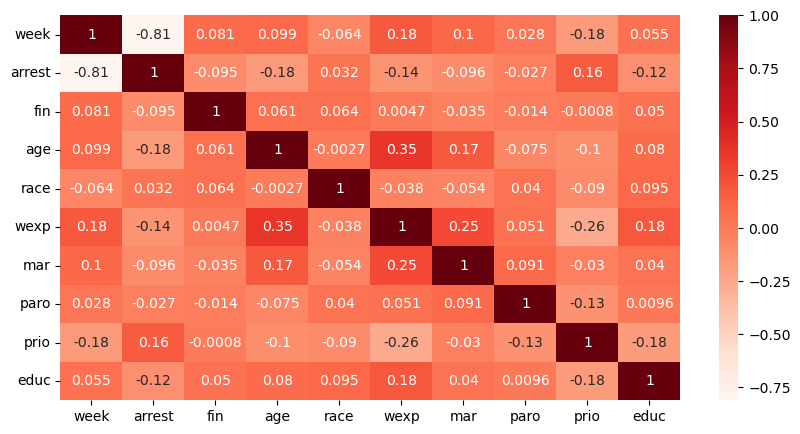

In [12]:
''' Using a heatmap to find the relationship between the given parameters'''

import seaborn as sns
import matplotlib.pyplot as plt

dfCorr = data.corr()
filteredDf = dfCorr.copy()
plt.figure(figsize=(10,5))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [13]:
''' Checks for non-values present in each column'''
data.isna().sum()

week      0
arrest    0
fin       0
age       0
race      0
wexp      0
mar       0
paro      0
prio      0
educ      0
dtype: int64

In [14]:
''' drop non-values present in each column'''
data = data.dropna(axis=0)

In [15]:
''' import relevant libraries'''
import numpy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
import warnings

In [16]:
''' Import train_test_split for the supervised learning
    
    This model is going to predict week of rearrest, given the other inputs such as age, race, etc
    
    '''
X = data.drop(['week'], axis=1)
y = data['week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [17]:
'''max iteration set to 10,000 because the data did not 
   converge within the maximum number of iterations using LogisticRegression()'''

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
def get_scores(y_true, y_pred):
    '''
    Return model evaluation metrics required
    average = 'micro' is used to calculate the micro-averaged precision score for a multiclass classification
    with warning was added to prevent the division of our prediction by zero, which occurs when our average is set to weighted
    '''
    with warnings.catch_warnings():
        warnings.simplefilter("always")  # Show the warning every time
        precision = precision_score(y_true, y_pred, average='micro', zero_division='warn')
        recall = recall_score(y_true, y_pred, average='micro', zero_division='warn')
    return {
      "Accuracy:": f"{accuracy_score(y_true, y_pred) * 100:.2f}%",
      "Precision": f"{precision * 100:.2f}%",
      "Recall": f"{recall * 100:.2f}%",
      "F1": f"{f1_score(y_true, y_pred, average='micro') * 100:.2f}%"
    }

In [19]:
y_pred = logreg.predict(X_test)

get_scores(y_test, y_pred)

{'Accuracy:': '67.82%',
 'Precision': '67.82%',
 'Recall': '67.82%',
 'F1': '67.82%'}

# Accuracy
The model correctly predicts 67.8%% of the arrest week, given the data. 

# Precision
67.8% of the predictions made by the model as positives are true positives

# Recall
Around 67.8% of the true positive instances are correctly predicted.

# F1
This represents the harmonic mean of precision and recall. The resulting F1 of 67.8% indicates a balanced performance between the model precision and recall.

# Summary
The models accuracy, precision, recall and F1 are all are all equal, which suggests that the model's predictions are well-balanced across the different classes.